In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import IPython

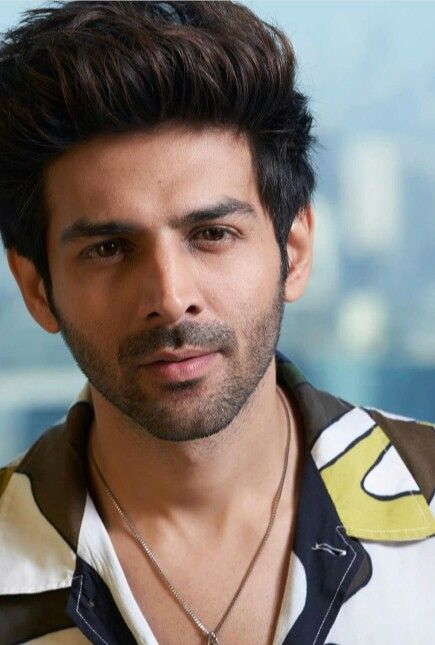

In [3]:
IPython.display.Image(r"C:\Users\Lenovo\Desktop\kartik\1.jpg")

In [5]:
kartik = cv2.imread(r"C:\Users\Lenovo\Desktop\kartik\1.jpg")

In [6]:
kartik.shape

(645, 435, 3)

In [8]:
reshaped_kartik = cv2.resize(kartik,(180,180))

In [9]:
reshaped_kartik.shape

(180, 180, 3)

In [61]:
kartik_array = []

for i in range(1,6):
    data = cv2.imread(f"C:\\Users\\Lenovo\\Desktop\\kartik\\{i}.jpg")
    final_data = cv2.resize(data,(180,180))
    
    kartik_array.append(final_data)

In [62]:
# kartik_array[0]

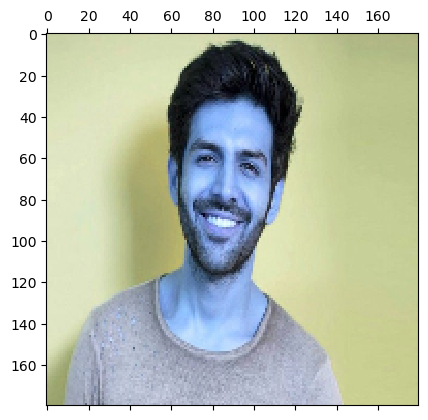

In [63]:
plt.matshow(kartik_array[3])

In [64]:
# kartik_array[2].shape

In [65]:
labels = [1]*5

In [66]:
labels

[1, 1, 1, 1, 1]

In [97]:
test_temp = cv2.imread(r"C:\Users\Lenovo\Desktop\kartik\6.jpg")
X_test = cv2.resize(test_temp,(180,180))
X_test = np.array([X_test])

In [98]:
X_train = np.array(kartik_array)

In [99]:
X_train

array([[[[228, 218, 189],
         [228, 218, 189],
         [228, 218, 189],
         ...,
         [226, 216, 187],
         [226, 216, 187],
         [226, 216, 187]],

        [[230, 220, 187],
         [230, 220, 186],
         [230, 220, 187],
         ...,
         [227, 216, 184],
         [227, 217, 183],
         [227, 217, 183]],

        [[232, 220, 184],
         [232, 220, 184],
         [232, 220, 184],
         ...,
         [230, 218, 182],
         [230, 218, 182],
         [230, 218, 182]],

        ...,

        [[ 42,  47,  52],
         [ 40,  45,  50],
         [ 38,  43,  48],
         ...,
         [238, 232, 227],
         [237, 231, 226],
         [237, 232, 226]],

        [[ 34,  45,  49],
         [ 33,  44,  48],
         [ 33,  41,  45],
         ...,
         [238, 231, 226],
         [237, 230, 225],
         [237, 232, 227]],

        [[ 36,  46,  48],
         [ 36,  45,  48],
         [ 34,  40,  43],
         ...,
         [240, 231, 227],
        

In [100]:
y_train = np.array([1]*5)
y_test = np.array([1])

In [101]:
X_train.shape

(5, 180, 180, 3)

In [102]:
X_test.shape

(1, 180, 180, 3)

In [103]:
y_train.shape

(5,)

In [104]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [105]:
num_classes = 2

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)              

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.6873 - accuracy: 0.6000
Epoch 2/10
1/1 [==============================] - 0s 84ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 88ms/step - loss: 6.9141e-06 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 197ms/step - loss: 4.7684e-08 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 185ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 104ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 102ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 176ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 189ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 118ms/step - loss: 0.0000e+00 - accuracy:

In [106]:
X_test_scaled.shape

(1, 180, 180, 3)

In [107]:
y_test.shape

(1,)

In [108]:
X_train_scaled.shape

(5, 180, 180, 3)

In [109]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 219ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [111]:
np.argmax(model.predict(X_test))

1/1 [==============================] - 0s 28ms/step


1

In [113]:
data = cv2.imread(r'C:\Users\Lenovo\Desktop\kartik\7.jpg')
X_test = cv2.resize(data,(180,180))
X_test = np.array([X_test])

In [114]:
X_test_scaled = X_test/255

In [117]:
# X_test_scaled
np.argmax(model.predict(X_test_scaled))

1/1 [==============================] - 0s 94ms/step


1